<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp25-notes/blob/main/Day16_Perceptrons_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day16
## Perceptrons

#### CS167: Machine Learning, Spring 2025


📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp25/cs167_syllabus_sp25.pdf)

# Perceptron

The mathematical model of a _single neuron_ in a neural network is called a __perceptron__.
- Each $x_{i}$ is one of the predictor features--i.e. sepal length, gender, age, etc.
- Each $w_{j}$ is some weight we multiply the feature value by.

__Big Question__: How do we determine the weights that best classify the data?

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/day16_perceptron.png" width=550/>
</div>

# The Forward Step:

The __forward step__ in a neural network is the step of receiving input, and getting an output based on the input. In other words, making a prediction from an input. This step is also known as the _inference step_.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/day16_forwardstep.png" width=550/>
</div>


# The Backward Step:

The __backward step__ in a neural network is the step of checking to see if the model got the prediction correct, and if not, adjusting the weights to make a better prediction next time. We also call this step _updating the weights_.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/day16_backwardstep.png" width=550/>
</div>


# Perceptron

We can prove the perceptron training algorithm will converge to weight values that correctly classify all training examples (in a fintite number of applications):
- if training data is linearly separable and
- learning rate is sufficiently small

Perceptrons are primarily used as a __binary classifier__.
- cat v dog, spam v ham, 1 v 0, etc.

To use a perceptron for the Iris data, we need to do something... any ideas?

## Recall: Dummy Variables

A __dummy variable__ is one that takes only the value of 0 or 1 to indicate the absence or presence of some categorical effect.
- When it doesn’t make sense for an attribute to have a numeric order, a dummy variable may be a solution that will allow the data to be applied in a machine learning algorithm.
- In sklearn, all data needs to be numeric.


__Dummy Variables__ are also referred to as __one-hot encoding__

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/day16_onehot.png" width=800/>
</div>

## Load your data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
path = '/content/drive/MyDrive/cs167_sp25/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

In [ ]:
iris_dummies = pandas.get_dummies(iris_data, columns=['species'])
iris_dummies.head()

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


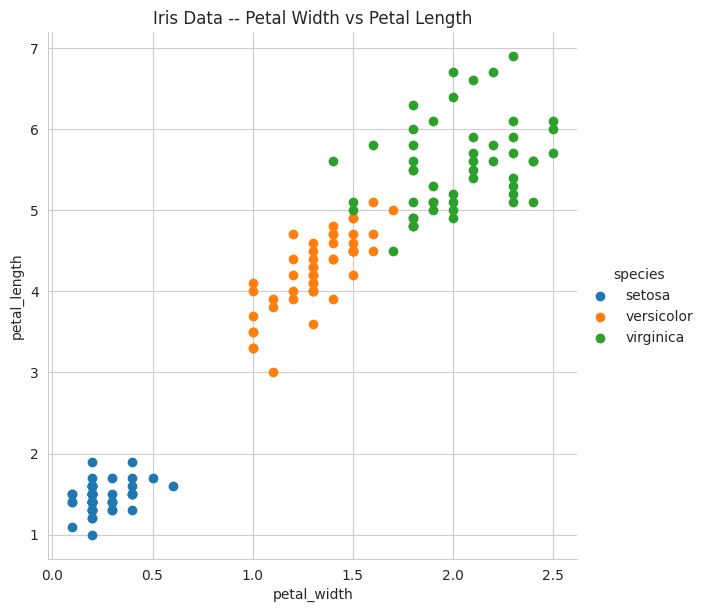

In [ ]:
#let's take a look at the data:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
sns.set_style("whitegrid")

# use seaborn to create a scatterplot
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend().set(title='Iris Data -- Petal Width vs Petal Length')

# Perceptron Code

- Documentation: [`sklearn.linear_model.Perceptron()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
### use a Perceptron to predict if an iris is a Setosa

import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics

#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
#import warnings
#warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-setosa"
#target = "species_Iris-versicolor"
#target = "species_Iris-virginica"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)
print('train_data.shape: ', train_data.shape)
print('test_data.shape: ', test_data.shape)
print('all target labels (', target, '): \n')
print(iris_dummies[target])

train_data.shape:  (120, 4)
test_data.shape:  (30, 4)
all target labels ( species_Iris-setosa ): 

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species_Iris-setosa, Length: 150, dtype: uint8


In [ ]:
# check the invividual test samples
test_data.head(30)

,sepal length,sepal width,petal length,petal width
119,6.0,2.2,5.0,1.5
128,6.4,2.8,5.6,2.1
135,7.7,3.0,6.1,2.3
91,6.1,3.0,4.6,1.4
112,6.8,3.0,5.5,2.1
71,6.1,2.8,4.0,1.3
123,6.3,2.7,4.9,1.8
85,6.0,3.4,4.5,1.6
147,6.5,3.0,5.2,2.0
143,6.8,3.2,5.9,2.3


In [ ]:
# check the invividual test samples ground-truth
test_sln.head(30)

119    0
128    0
135    0
91     0
112    0
71     0
123    0
85     0
147    0
143    0
127    0
39     1
38     1
93     0
23     1
133    0
30     1
83     0
37     1
41     1
81     0
120    0
43     1
2      1
64     0
62     0
56     0
67     0
49     1
63     0
Name: species_Iris-setosa, dtype: uint8

Setosa accuracy: 1.0
confusion matrix: 
 [[21  0]
 [ 0  9]]
confusion matrix display: 



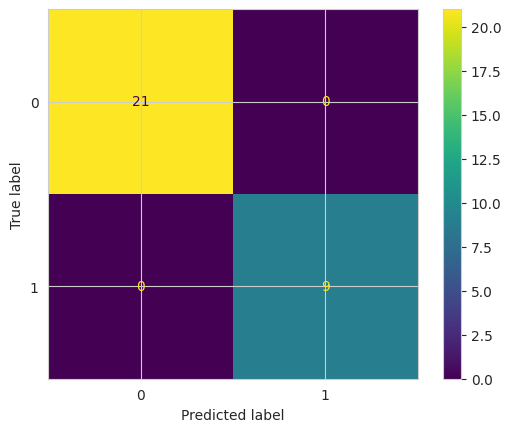

In [ ]:
from sklearn.linear_model import Perceptron

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))
conf_mat = metrics.confusion_matrix(test_sln, iris_perc_predictions)
print("confusion matrix: \n", conf_mat)
print("confusion matrix display: \n")
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()
plt.show()

## 💬 In class Exercise 1:
- Given the example for species_Iris-versicolor, how does Perceptron do for:
  - species_Iris-virginica
  - species_Iris-setosa
- Do you expect these to also give 100% accuracy? Why or why not?

In [ ]:
# your code here